# Statistics Using Python

In [1]:
# import packages
import math
import io
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import pymc3
# need to type the line below this into the cmd prompt
# set MKL_THREADING_LAYER=GNU
import pymc3

# default style for plt plots to seaborn
sns.set()

## Exploratory Data Analysis (EDA)
- It's best practice to do quick exploration prior to advanced analysis
    - viewing structure
    - checking for NaN's
    - calculating summary stats
    - plotting histograms
    - plotting boxplots to check for outliers, percentiles, and median
        - line is median, box is IQR, whiskers go to 1.5 IQR or range (whichever is greater), dots outliers
    - bee swarm plots to check distribution
        - avoids binning bias from histograms
        - however don't do well with too many data points
    - empirical cumulative distribution function (ECDF)
        - very good plot, do this early to examine the data
        - often include multiple columns (or separate by categories) if it makes sense to do this
        - good function for returning the x, y values for an ECDF
        - x label should be the value your looking at, y label is CDF
        
```python
def ecdf(data):
"""Return x, y data for an ECDF receiving a 1d array, list, or series."""
         
    # compute the number of points
    n = len(data)
            
    # sort the x data and store
    x = np.sort(data)
            
    # compute y using the distribution
    y = np.arange(1, n+1) / n
            
    # return x and y
    return x, y
```

#### Summary Stats
- Good idea to check quick summary stats
    - `np.mean()`
    - `np.median()` (50th percentile)
    - `np.percentile(data, list)`
        - supply a list of the percentiles you want to compute as ints or a single value
        - interquartile range (IQR) is 25%-75%
    - `np.var()` variance
    - `np.std()` stdev
    - `df.column.value_counts()`
        - set `normalize=True` to get percentages

#### Simple Correlation
- Covariance
    - `np.cov(arr1, arr2)`
        - returns a 2d array of covariance (entry `[0,1]` has the data of interest)
        - `co_var = np.cov(arr1, arr2)` then `real_co_var = co_var[0,1]`
    - mean of the product of the x/y distance from the mean
        - ((x - x_mean)(y - y_mean)) / number of observations
        - positive covariance means a positive correlation, negative means negative corr
    - function
    
```python
def co_var(x, y):
    """Compute covariance between two arrays."""
    
    # Compute covariance matrix: cov_mat
    cov_mat = np.cov(x,y) 

    # Return entry [0,1]
    return cov_mat[0,1]
```

- Pearson Correlation Coefficient
    - `np.corrcoef(arr1, arr2)`
        - returns a 2d array (entry `[0,1]` has the data of interest)
        - see covariance above for data extraction
    - Greek letter lowercase rho (kinda like a p)
    - covariance / (np.std(x) * np.std(y))
        - variability due to covariance / independent variability
    - dimensionless (no units)
    - range -1 complete negative corr, to 0 no corr, to 1 complete positive corr
    - closer to -1 or 1, the more tightly packed points are, the better the corr
    - function:
    
```python
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y) 

    # Return entry [0,1]
    return corr_mat[0,1]
```

## Probabilities
#### Basic Info
- Random Numbers
    - `np.random` module
        - `np.random.random([size=])`
            - random number generator (0 < n < 1)
            - `size=` specify the number of random numbers to generate
        - `np.random.seed()`
            - 'seeds' a number for the random number generator 
            - the same seed gives the same sequence for generated random numbers (pseudo-random)
- Simulating Events
    - use for loops to do simulations
    - may need to initialize an empty numpy array
        - `empty_array = np.empty(n)` where n is the number of entries you want
    - Syntax:
        - `for _ in range(n):` to loop/simulate n times
            - can just use `_` because we don't care about using it as a variable
            - update some counter or other such thing in the loop
- Hacker Statistics
    - simulate data to draw inferences to the population vs. actually sampling
    - sort of like resampling
    - **Strategy:**
        - determine how to simulate the data
        - simulate many many times
        - compute probability as the fraction of trials that have the outcome of interest

#### Discrete Outcomes
- Bernoulli Trial
    - T/F binary type trials (heads/tails)
- Probability Mass Function (PMF)
    - set of probabilities of discrete outcomes
        - discrete outcomes like 1-6 when rolling dice
    - generate by simulating something a whole bunch of times
    - **Plotting a PMF**
        - this is the primary shape of the distribution
        - create an array of possible outcomes, and link that to the probability of those outcomes
        - plot hist of possible outcome/number successes on the x and probability of that outcome on the y
- Binomial Distribution
    - Distribution where the outcome of a single event is binary (heads/tails, default/not default)
    - Sampling from the binomial distribution
        - `np.random.binomial(n, p, size=None)`
            - `n` is the number of trials
                - if trying to get the probability of flipping 4 heads/4 attempts, this number is 4
            - `p` is the probability of success (decimal)
                - in coin flip example, this is 0.5 (probability of 1 heads)
            - `size` is the output shape, default is None
                - can supply scalar or an array or nothing at all
                - can also think of size as the number of random samples to take from the binomial distribution
            - output
                - tells you the number of successes achieved from each set of trials
                - in coin flip example, the max output for a single event is 4 (4/4 heads)
                - setting the size=10, will provide an array of 10 events (each consisting of 4 flips)
                    - the value of each item is the number of successes (how many heads were observed)
- Poisson Distribution
    - Poisson process:
        - timing of the next event is completely independent of when the previous event happened
    - poisson distribution -> number of arrivals in a given amount of time and has an average rate of arrival
        - limit of the binomial distribution for low probability of success and a large number of trials (rare events)
    - sampling the poisson distribution
        - `np.random.poisson(lam, size=None)`
            - `lam` is the expectation of interval or average interval
            - size is the number of times to sample
            - output: values drawn from the sample

In [2]:
# use binomial function
# 4 is the number of trials (flip a coin 4 times)
# 4 will be the max of any values (all events true i.e. all heads)
# 0.5 is the probability of a single success (flipping a heads)
# 10 is the number of samples to take (flip 4 coins, 10 times)
np.random.binomial(4, 0.5, 10)

array([1, 3, 4, 2, 3, 3, 2, 3, 2, 1])

In [3]:
# use poisson function
# 6 is the average arrival rate
# 10 is the number of times to sample
np.random.poisson(6, 10)

array([ 8, 11,  3,  2,  5,  8,  4,  5,  3,  4])

In [4]:
# example problem:
# average number of no hitters per year is 251/115 (~ 2.18)
# is 7 no hitters a season anomalous?

# get a large sample from the poisson distribution around the average
n_nohitters = np.random.poisson(251/115, 10000)

# calculate the number of those greater than 7
n_large = np.sum(n_nohitters >= 7)

# calculate probability of getting 7 or more
p_large = n_large/10000

# print the probability of 7 or more
print(p_large)

0.008


Text(0.5, 1.0, 'Probability Distribution\nfor Number of MLB No-Hitters')

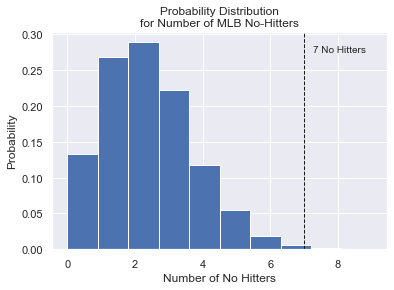

In [12]:
# plot the associated poisson distribution from the question above

plt.hist(n_nohitters, density=True)

# add location of 7 to the plot
plt.axvline(7, color='k', linestyle='dashed', linewidth=1)

# add text to the line
#plt.text(x.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(x.mean()))
plt.text(x=7.25, y=0.275, s='7 No Hitters')

plt.xlabel('Number of No Hitters')
plt.ylabel('Probability')
plt.title('Probability Distribution\nfor Number of MLB No-Hitters')

#### Continuous Variables
- Probability Density Function (PDF)
    - set of probabilities for continuous outcomes
    - the area under the curve is the probability
        - use the cumulative distribution function (CDF) to see exact probabilities
            - y-axis value is the probability that an observation is that value or lower
- Normal Distribution
    - aka 'Gaussian distribution'
    - continuous variable with one peak and symmetric distribution
    - mean determines where the peak is, std determines how wide it is
        - not necessarily the sample mean and std
    - **comparing samples to the normal distribution**
        - could plot hist of observations and a normal curve, not necessarily the best
            - binning bias, by choosing different numbers of bins
        - **better way**
            - calculate theoretical cdf
                - use ecdf function with `samples = np.random.normal(mean, std, size=)`
                    - sample mean and std are ok estimates to use here
                    - `x_theor, y_theor = ecdf(samples)`
            - calculate observed ecdf
                - `x, y = ecdf(data)`
        - compare plots
            - `plt.plot(x_theor, y_theor)` produces a smooth line plot of theoretical values
            - `plt.plot(x, y, marker='.', linestyle='none')` plots scatter of observed values
- Exponential Distribution
    - continuous analog for the geometric distribution (discrete)
    - waiting time of arrivals from a poisson process are exponentially distributed
        - more like an exponential decay with low probabilities of long wait times and high for short
    - sampling this distribution
        - `np.random.exponential(scale, size=None)`
            - scale = beta = 1/lambda (datacamp calls this the 'mean')

## Statistical Inference
- Some different python packages for stat inf
    - scipy.stats
    - statsmodels
    - numpy (hacker stats)
- Optimal Parameters
    - parameters that bring the model in closest agreement with the data
        - like mean, std for sampling from a distrbution (np.random.normal() etc.)
    - if the model is wrong, the optimal parameters are not meaningful
- Linear Regression
    - **least squares**
        - minimize the sum of the squared residuals to find best fit
        - `np.polyfit(x, y, deg)` works with polynomial functions (including 1st degree linear)
            - `x` and `y` are the x/y data
            - `deg` is the degree to fit (1 for linear)
            - output
                - polynomial coefficients, highest power first
                - if y was 2-D, coeff. for k-th dataset are in `p[:,k]`
                - for linear regression, output is `slope, intercept`
    - see `pearson_r` function above for correlation coefficient
    - add a regression line to a plot
        - include your scatter plot `plt.plot(x_data, y_data, marker='.', linestyle='none')`
        - `slope, intercept = np.polyfit(x_data, y_data, 1)`
        - `x = np.array([min, max])` choose min/max x values for your line
        - `y = slope * x + intercept`
        - `plt.plot(x, y)`
    - checking the optimization (just for fun)
        - generate a list of possible slopes (m values for y = mx + b)
            - `m_vals = np.linspace(min, max, samples)`
                - specify the min value for potential slope, max value, and how many values to get (~200 ok)
            - `rss = np.empty_like(m_vals)`
                - initialize empty array the same size/shape as m_vals for **residual sum of squares**
            - `for i, m in enumerate(m_vals): rss[i] = np.sum((y_data - m * x_data - b)**2)`
                - loop through to populate your array, substitute y_data and x_data with actual data
                - b should be calculated using np.polyfit() to find the slope
            - `plt.plot(m_vals, rss, '-')` to view the plot

## Confidence Intervals
- Range of values with chosen percentages that show the probability of getting the true value
    - 95% confidence interval goes from 2.5% quantile to 97.5% quantile
    - Can generate by simulating many times if you know the shape of the distribution

## Bootstrapping
- Generating a large family of samples from the one you have (sample with replacement)
    - Do not need to make assumptions about the shape of the distribution
- `df.column.sample(n, replace=True)`
    - `n` the number of samples to take
    - `replace=False` by default, set True to sample with replacement
- Use bootstrapping to get a histogram of the population mean using a smaller sample for 'variable' column in 'df'
    ```python
    bootstrap = pd.DataFrame({'variable_mean': [df.sample(100,replace=True).variable.mean() for i in range(1000)]})
    bootstrap.variable_mean.hist(histtype='step')
    # draw original mean as a line on top of the histogram
    plt.axvline(df.variable.mean(),color='C1') 
    ```
- How this works
    - This code creates a series of 1000 different 'means'
    - Each 'mean' is generated by resampling the data 100 times with replacement
- Generate 95% confidence intervals
    ```python
    bootstrap.variable_mean.quantile(0.025), bootstrap.variable_mean.quantile(0.975)
    ```